In [ ]:
# Install the pyclustering library for performing clustering
!pip install pyclustering

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split # Importing train_test_split function for splitting the data
from sklearn.preprocessing import StandardScaler # Importing StandardScaler for feature scaling
from sklearn.neighbors import KNeighborsClassifier # K-nearest neighbors classifier model
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold  #Importing  K-fold cross-validation
from sklearn.model_selection import StratifiedKFold  #Importing Stratified K-fold cross-validation
from sklearn.model_selection import cross_val_score # Importing function for computing cross-validation scores
from sklearn.metrics import classification_report # Importing function for generating classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import pickle

In [ ]:
df=pd.read_csv('/content/framingham.csv')

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.rename(columns={'male': 'gender'}, inplace=True)

In [ ]:
df.shape

(4240, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
# Impute Missing Values using SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

columns = ['glucose','cigsPerDay','totChol','BMI','heartRate','BPMeds']
imputer=imputer.fit(df[columns])

df[columns]=imputer.transform(df[columns])

In [ ]:
#drop the "education" variable
df.drop('education', axis=1, inplace=True)


In [ ]:
df.isnull().sum()

gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df.shape

(4240, 15)

In [ ]:
df.corr()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.029014,0.197026,0.316023,-0.052203,-0.004550,0.005853,0.015693,-0.070064,-0.035879,0.058199,0.081705,-0.116913,0.005718,0.088374
age,-0.029014,1.000000,-0.213662,-0.192534,0.122036,0.057679,0.306799,0.101314,0.260691,0.394053,0.205586,0.135578,-0.012839,0.116951,0.225408
currentSmoker,0.197026,-0.213662,1.000000,0.767055,-0.048621,-0.032980,-0.103710,-0.044285,-0.046211,-0.130281,-0.107933,-0.167483,0.062678,-0.054062,0.019448
cigsPerDay,0.316023,-0.192534,0.767055,1.000000,-0.045847,-0.032711,-0.066444,-0.037086,-0.026182,-0.088523,-0.056473,-0.092888,0.075257,-0.056020,0.057646
BPMeds,-0.052203,0.122036,-0.048621,-0.045847,1.000000,0.115008,0.259125,0.051584,0.078973,0.252023,0.192387,0.099586,0.015172,0.048925,0.086805
prevalentStroke,-0.004550,0.057679,-0.032980,-0.032711,0.115008,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.024856,-0.017674,0.018065,0.061823
prevalentHyp,0.005853,0.306799,-0.103710,-0.066444,0.259125,0.074791,1.000000,0.077752,0.162683,0.696656,0.615840,0.300599,0.146777,0.082757,0.177458
diabetes,0.015693,0.101314,-0.044285,-0.037086,0.051584,0.006955,0.077752,1.000000,0.040161,0.111265,0.050260,0.086282,0.048986,0.605709,0.097344
totChol,-0.070064,0.260691,-0.046211,-0.026182,0.078973,0.000105,0.162683,0.040161,1.000000,0.207436,0.163423,0.115013,0.090678,0.044710,0.081807
sysBP,-0.035879,0.394053,-0.130281,-0.088523,0.252023,0.057000,0.696656,0.111265,0.207436,1.000000,0.783952,0.325172,0.182084,0.134561,0.216374


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,4240.0,0.429245,0.495027,0.00,0.0000,0.00,1.0000,1.0
age,4240.0,49.580189,8.572942,32.00,42.0000,49.00,56.0000,70.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.0000,0.00,1.0000,1.0
cigsPerDay,4240.0,9.005937,11.881610,0.00,0.0000,0.00,20.0000,70.0
BPMeds,4240.0,0.029615,0.168481,0.00,0.0000,0.00,0.0000,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.0000,0.00,0.0000,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.0000,0.00,1.0000,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.0000,0.00,0.0000,1.0
totChol,4240.0,236.699523,44.327521,107.00,206.0000,234.00,262.0000,696.0
sysBP,4240.0,132.354599,22.033300,83.50,117.0000,128.00,144.0000,295.0


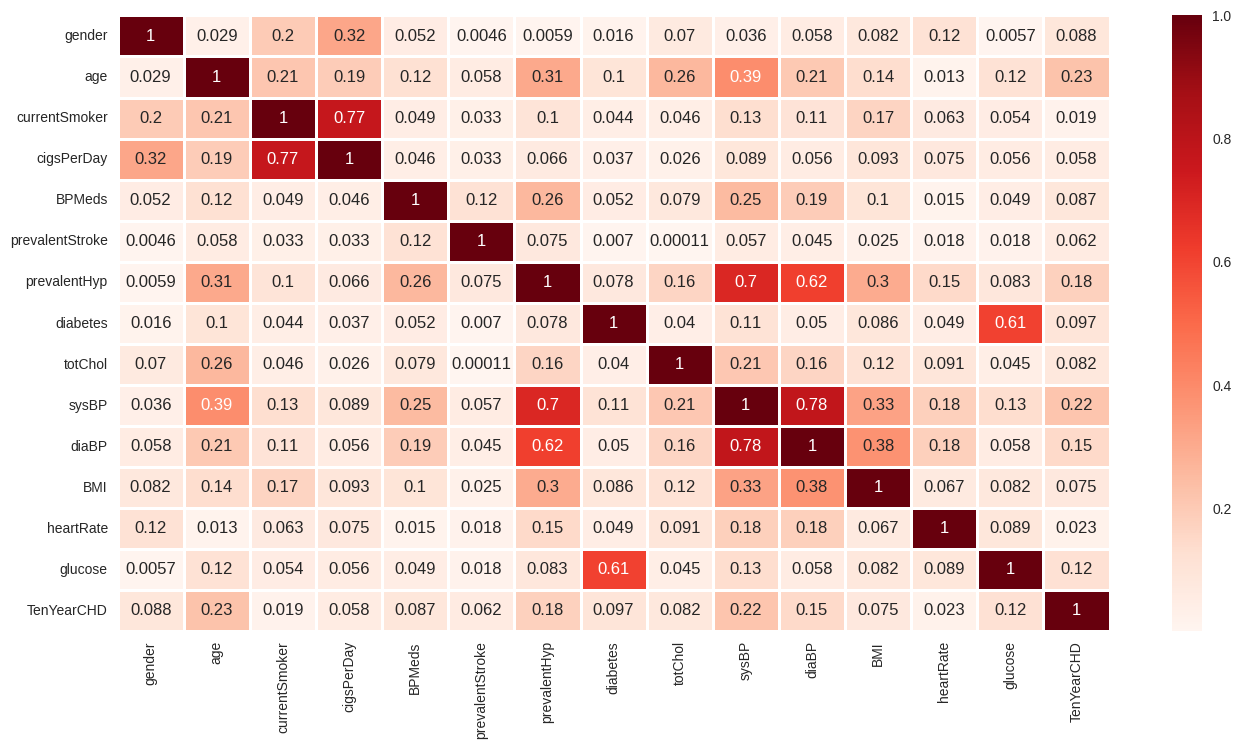

age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.120451
diabetes           0.097344
gender             0.088374
BPMeds             0.086805
totChol            0.081807
BMI                0.074788
prevalentStroke    0.061823
cigsPerDay         0.057646
heartRate          0.022892
currentSmoker      0.019448
Name: TenYearCHD, dtype: float64


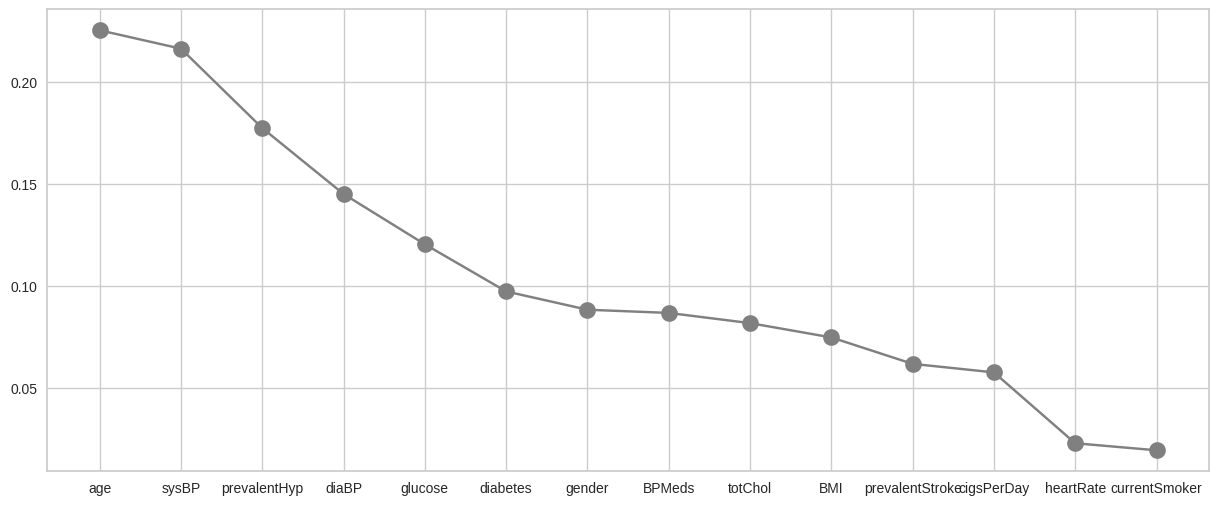

In [ ]:
#correlation with the Ten-Year-Heart Disease
new_df=df
plt.figure(figsize=(16,8))
corr=new_df.corr()
sb.heatmap(abs(corr),lw=1,annot=True,cmap="Reds")
plt.show()

C=abs(corr["TenYearCHD"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="grey")
plt.scatter(C.index,C,color="grey",lw=5)

In [ ]:
# calculating the percentage of instances with and without heart disease
count_no = len(df[df['TenYearCHD']==0])
count_yes = len(df[df['TenYearCHD']==1])
pct_of_no = count_no/(count_no+count_yes)
print("percentage of not having a heart disease is", pct_of_no*100)
pct_of_yes = count_yes/(count_no+count_yes)
print("percentage of having a heart disease ", pct_of_yes*100)

percentage of not having a heart disease is 84.81132075471697
percentage of having a heart disease  15.188679245283017


Vizualizing the variables with missing data

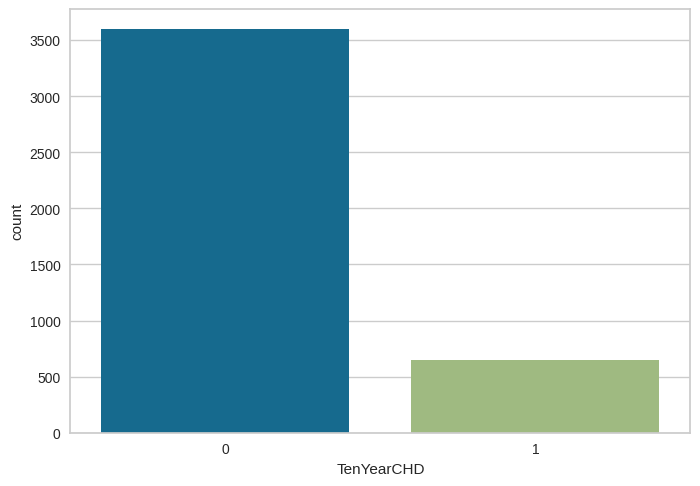

In [ ]:
sb.countplot(x='TenYearCHD',data=df)
plt.show()

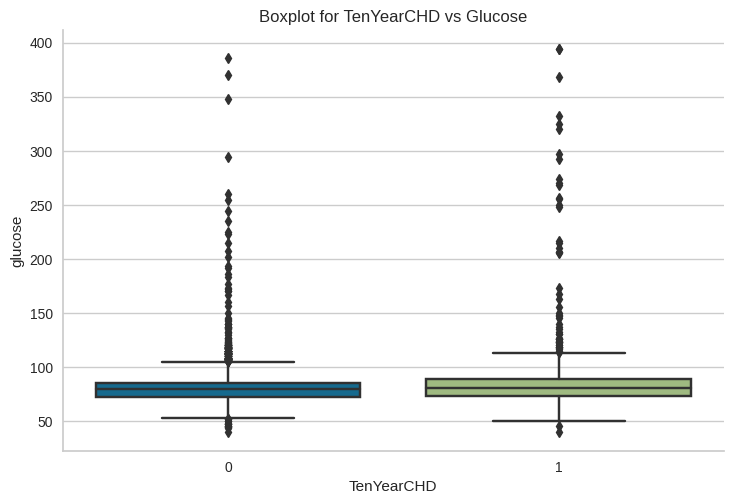

In [ ]:
sb.catplot(x="TenYearCHD", y="glucose", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for TenYearCHD vs Glucose")
plt.show()

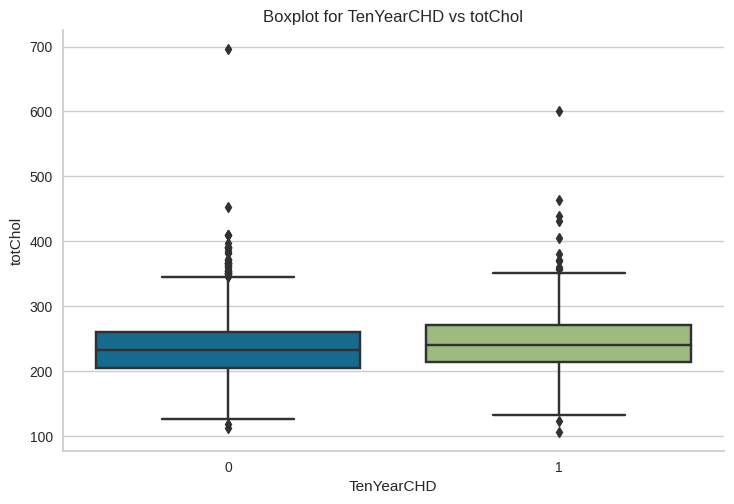

In [ ]:
sb.catplot(x="TenYearCHD", y="totChol", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for TenYearCHD vs totChol")
plt.show()

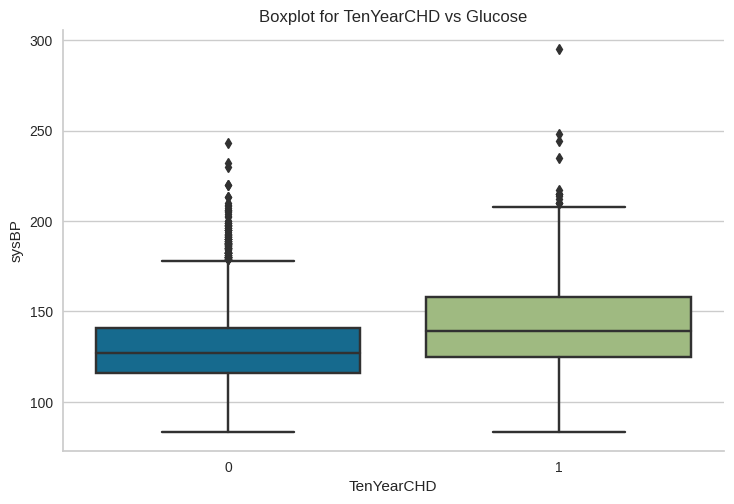

In [ ]:
sb.catplot(x="TenYearCHD", y="sysBP", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for TenYearCHD vs Glucose")
plt.show()

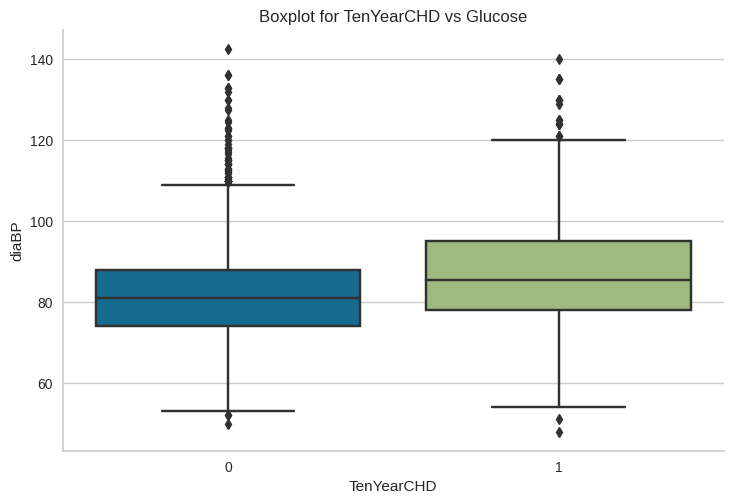

In [ ]:
sb.catplot(x="TenYearCHD", y="diaBP", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for TenYearCHD vs Glucose")
plt.show()

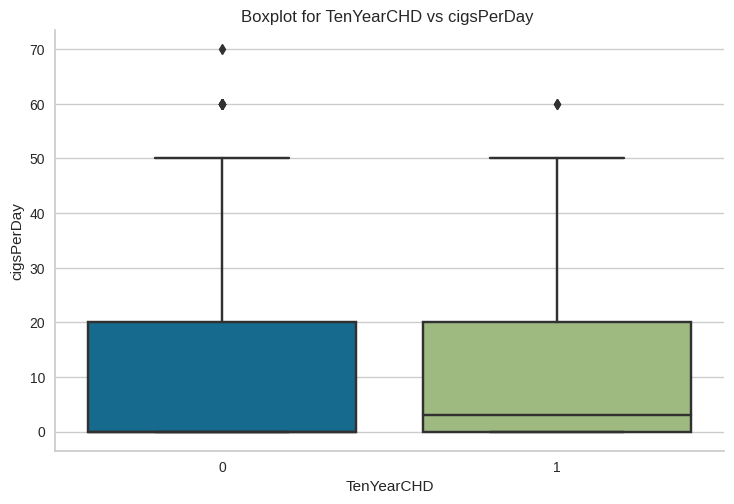

In [ ]:
sb.catplot(x="TenYearCHD", y="cigsPerDay", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for TenYearCHD vs cigsPerDay ")
plt.show()

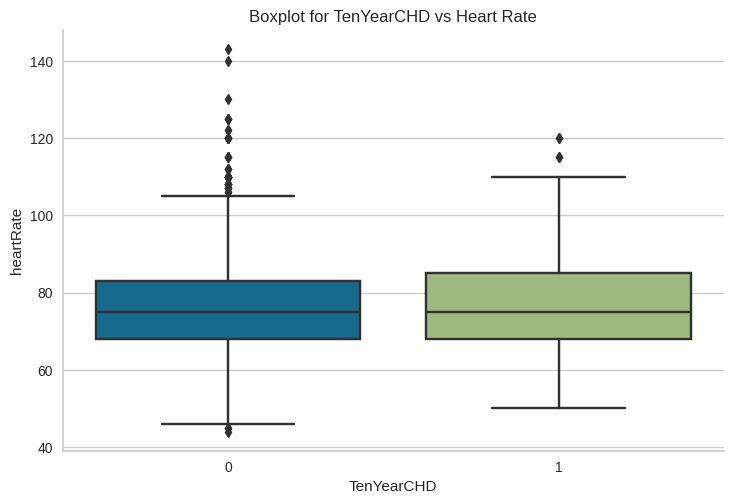

In [ ]:
sb.catplot(x="TenYearCHD", y="heartRate", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for TenYearCHD vs Heart Rate")
plt.show()

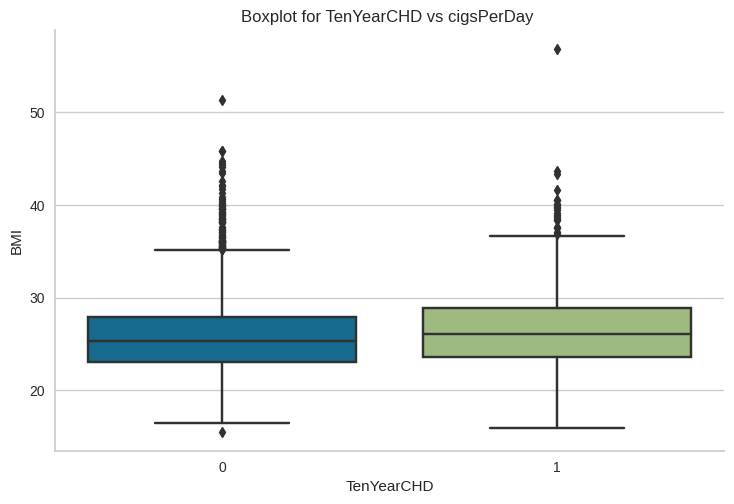

In [ ]:
sb.catplot(x="TenYearCHD", y="BMI", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for TenYearCHD vs cigsPerDay ")
plt.show()

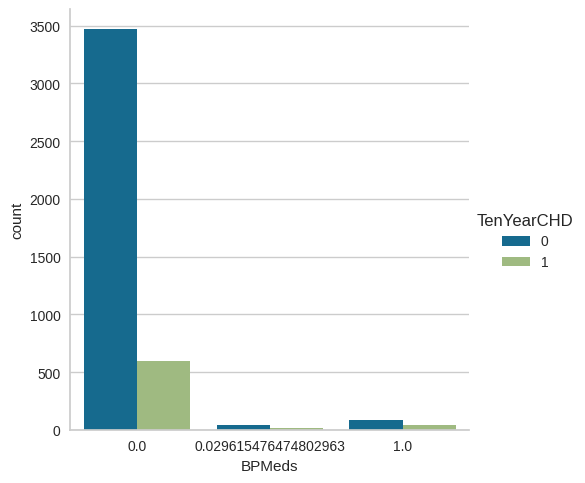

In [ ]:
sb.catplot(x='BPMeds',hue='TenYearCHD',data=df,kind="count")

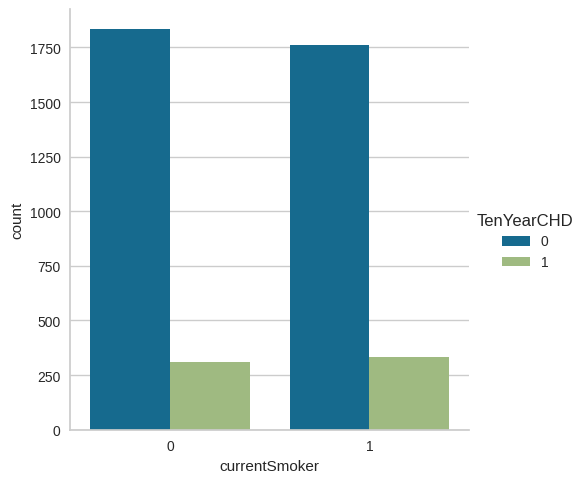

In [ ]:
sb.catplot(x='currentSmoker',hue='TenYearCHD',data=df,kind="count")

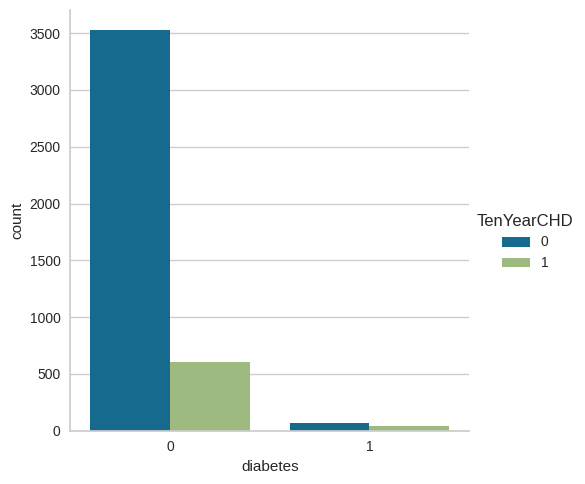

In [ ]:
sb.catplot(x='diabetes',hue='TenYearCHD',data=df,kind="count")

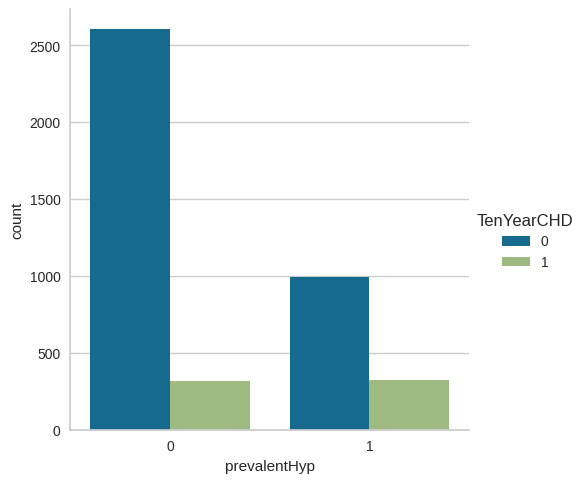

In [ ]:
sb.catplot(x='prevalentHyp',hue='TenYearCHD',data=df,kind="count")

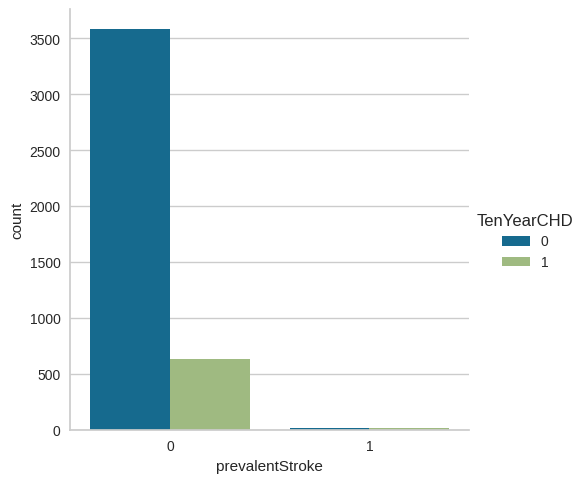

In [ ]:
sb.catplot(x='prevalentStroke',hue='TenYearCHD',data=df,kind="count")

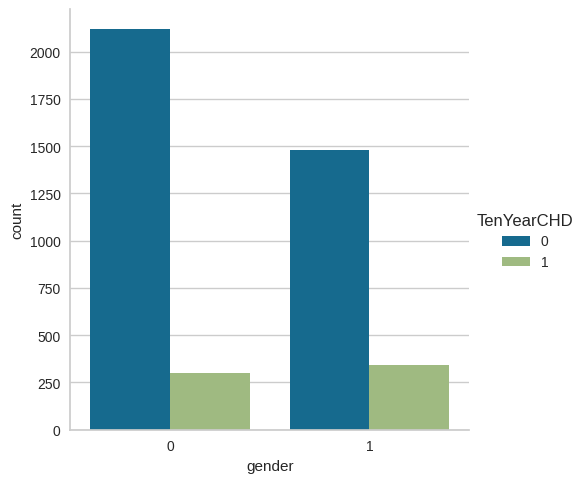

In [ ]:
sb.catplot(x='gender',hue='TenYearCHD',data=df,kind="count")

In [ ]:
#Remove Outliers using IQR (Interquartile Range)
def remove_outliers_iqr(df, columns, threshold=1.5):
    for column in columns:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the lower and upper bounds to detect outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Remove outliers in-place from the DataFrame
        df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)

# Example usage:
# Replace 'df' with your DataFrame
# You can specify the columns you want to remove outliers from in the 'columns' list
# You can set the 'threshold' parameter to control how aggressively outliers are removed

columns_to_remove_outliers = ['glucose', 'BMI', 'heartRate','totChol','sysBP','diaBP']
remove_outliers_iqr(df, columns_to_remove_outliers, threshold=1.5)

In [ ]:
df.shape


(3620, 15)

In [ ]:
#X= df.drop(['TenYearCHD'],axis=1)
#y=df['TenYearCHD']

In [ ]:
#removing "prevalentStroke" and "currentSmoker" variables after extracting feature importances
#from Random Forest Classifier and found that these are not important features.
X= df.drop(['TenYearCHD','prevalentStroke','currentSmoker'],axis=1)
y=df['TenYearCHD']

In [ ]:
X

,gender,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0.0,0.000000,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,0.0,0.000000,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,20.0,0.000000,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,30.0,0.000000,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,23.0,0.000000,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,43.0,0.000000,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,20.0,0.029615,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,15.0,0.000000,0,0,210.0,126.5,87.0,19.16,86.0,81.963655
4238,1,40,0.0,0.000000,1,0,185.0,141.0,98.0,25.60,67.0,72.000000


In [ ]:
df.columns

Index(['gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Handling imbalanced target variable with SMOTE oversampling
from imblearn.over_sampling import SMOTE
import pandas as pd
os = SMOTE(random_state=0)

# Apply SMOTE for oversampling the minority class to the training data only
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

# Convert the oversampled arrays back to DataFrames
os_data_X = pd.DataFrame(data=os_data_X, columns=X.columns)
os_data_y = pd.Series(os_data_y, name='TenYearCHD')

# We can check the numbers of our data
print("length of oversampled data is ", len(os_data_X))
print("Number of not having CHD  in oversampled data", len(os_data_y[os_data_y == 0]))
print("Number of having CHD", len(os_data_y[os_data_y == 1]))
print("Proportion of not having CHD data in oversampled data is ", len(os_data_y[os_data_y == 0]) / len(os_data_X))
print("Proportion of having CHD data in oversampled data is ", len(os_data_y[os_data_y == 1]) / len(os_data_X))

length of oversampled data is  4384
Number of not having CHD  in oversampled data 2192
Number of having CHD 2192
Proportion of not having CHD data in oversampled data is  0.5
Proportion of having CHD data in oversampled data is  0.5


In [ ]:
# Dictionary of classifiers
classifiers = {
    'DT': DecisionTreeClassifier(),
    'knn': KNeighborsClassifier(n_neighbors=10),
    'GNB': GaussianNB(),
    'RFC': RandomForestClassifier(n_estimators=100),
    'LR': LogisticRegression(random_state=0, max_iter=100, solver='lbfgs', multi_class='auto'),
    # Exclude 'Linear SVM' and 'RBF SVM' due to warnings and potential performance issues
    #'Linear SVM': svm.SVC(kernel='linear', C=1, decision_function_shape='ovo'),
    #'RBF SVM': svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo'),
    'Poly SVM': svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo'),
    'Sigmoid SVM': svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')
}

# Loop through each classifier, fit, cross-validate, and print classification reports
for model, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    kf = KFold(n_splits=5)
    scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=kf)
    print(f'{model} CV Accuracy: {round(scores.mean() * 100, 2)}% (+/- {round(scores.std() * 100, 2)}%)')

    y_pred = classifier.predict(X_test)
    print(f'Classification Report for {model}')
    print(classification_report(y_test, y_pred))
    print()

DT CV Accuracy: 77.07% (+/- 0.5%)
Classification Report for DT
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       951
           1       0.13      0.16      0.15       135

    accuracy                           0.77      1086
   macro avg       0.51      0.51      0.51      1086
weighted avg       0.79      0.77      0.77      1086


knn CV Accuracy: 86.46% (+/- 0.71%)
Classification Report for knn
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       951
           1       0.00      0.00      0.00       135

    accuracy                           0.87      1086
   macro avg       0.44      0.50      0.47      1086
weighted avg       0.77      0.87      0.82      1086


GNB CV Accuracy: 81.89% (+/- 0.99%)
Classification Report for GNB
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       951
           1       0.25      0.22      0

In [ ]:
DT = DecisionTreeClassifier()

In [ ]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DT.feature_importances_

array([0.02301774, 0.13257868, 0.05026777, 0.0078598 , 0.00552085,
       0.00269136, 0.16419199, 0.14120777, 0.10539052, 0.16622006,
       0.10971493, 0.09133854])

In [ ]:
feature_names = X.columns

In [ ]:
feature_importance = pd.DataFrame(DT.feature_importances_, index = feature_names).sort_values(0,ascending=False)

In [ ]:
#extractig feature inmportance from decision tress
feature_importance

,0
BMI,0.166220
totChol,0.164192
sysBP,0.141208
age,0.132579
heartRate,0.109715
diaBP,0.105391
glucose,0.091339
cigsPerDay,0.050268
gender,0.023018
BPMeds,0.007860


In [ ]:
RFC=RandomForestClassifier()

In [ ]:
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
RFC.feature_importances_

array([0.0234979 , 0.12805844, 0.05884827, 0.00901199, 0.01620938,
       0.00287858, 0.13059262, 0.1448344 , 0.11946212, 0.14396402,
       0.1057212 , 0.11692105])

In [ ]:
feature_names = X.columns

In [ ]:
feature_importance = pd.DataFrame(RFC.feature_importances_, index = feature_names).sort_values(0,ascending=False)

In [ ]:
#extracting feature importance from Random Forest Classifier
feature_importance

,0
BMI,0.166220
totChol,0.164192
sysBP,0.141208
age,0.132579
heartRate,0.109715
diaBP,0.105391
glucose,0.091339
cigsPerDay,0.050268
gender,0.023018
BPMeds,0.007860


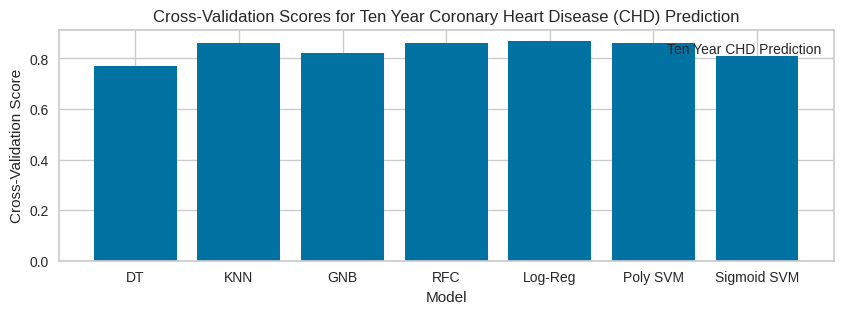

In [ ]:
# Visualization of Cross-Validation Scores for Ten Year CHD Prediction
# Models
X = ['DT', 'KNN', 'GNB', 'RFC', 'Log-Reg', 'Poly SVM', 'Sigmoid SVM']

# Cross-validation scores for Ten Year CHD prediction
cv_scores = [0.77, 0.86, 0.82, 0.86, 0.87, 0.86, 0.81]

# Number of bars
n_bars = len(X)

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (10, 3)

# Plotting the bars for Ten Year CHD prediction using the model names and respective data
plt.bar(X, cv_scores, label='Ten Year CHD Prediction')

# Setting the range of values for the X axis and labels
plt.xlabel("Model")
plt.ylabel("Cross-Validation Score")
plt.title("Cross-Validation Scores for Ten Year Coronary Heart Disease (CHD) Prediction")
plt.legend(loc='upper right')

plt.show()

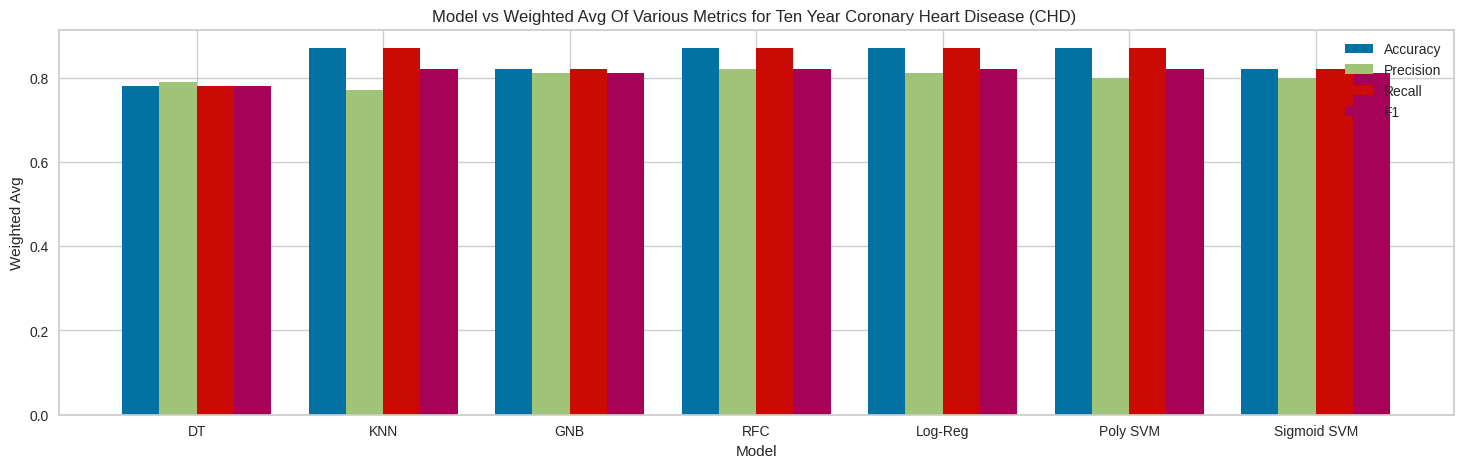

In [ ]:
# Visualization of Weighted Average Performance Metrics for Different ML Models
#Models
X = ['DT', 'KNN', 'GNB', 'RFC', 'Log-Reg', 'Poly SVM', 'Sigmoid SVM']

# Collect this information from the classification reports and store them in lists
accuracy = [0.78, 0.87, 0.82, 0.87, 0.87, 0.87, 0.82]
precision = [0.79, 0.77, 0.81, 0.82, 0.81, 0.80, 0.80]
recall = [0.78, 0.87, 0.82, 0.87, 0.87, 0.87, 0.82]
f1 = [0.78, 0.82, 0.81, 0.82, 0.82, 0.82, 0.81]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (18, 5)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics for Ten Year Coronary Heart Disease (CHD) ")
plt.legend(loc='upper right')

plt.show()

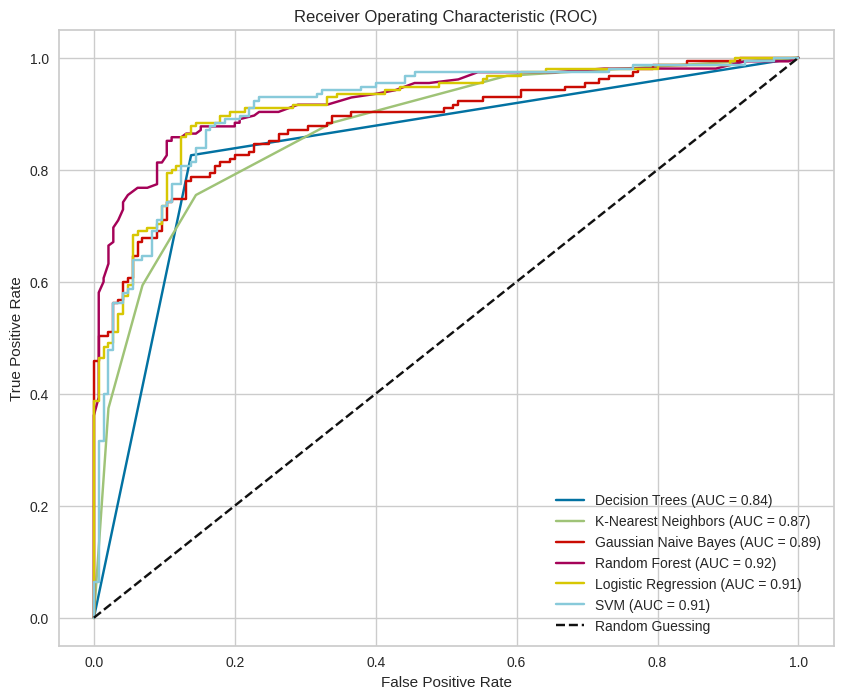

In [ ]:
# Create synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
# Initialize classifiers
classifiers = {
    "Decision Trees": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True)
}

# Create a figure and axis
plt.figure(figsize=(10, 8))

# Iterate through classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Show the plot
plt.show()








In [ ]:
df.columns

Index(['gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
X = df[['gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']].values # feature matrix
y = df['TenYearCHD'].values # class matrix

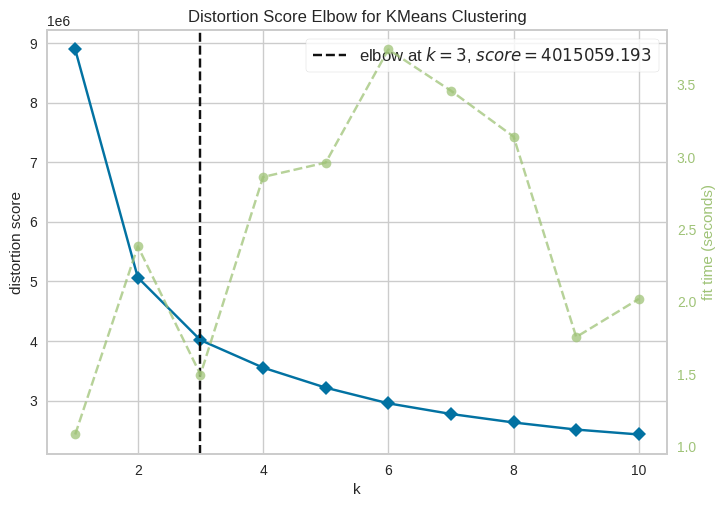

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

In [ ]:
# instatiate KMeans class and set the number of clusters
km_model = KMeans(n_clusters=3, random_state=10)

# call fit method with data
km = km_model.fit_predict(X)

# coordinates of cluster center
centroids = km_model.cluster_centers_

# cluster label for each data point
labels = km_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


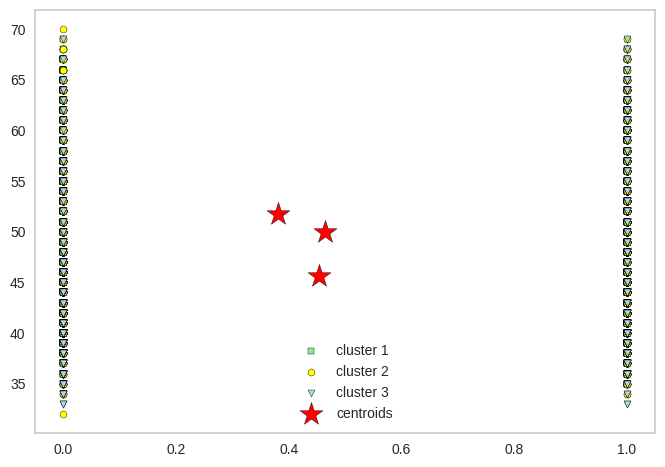

In [ ]:
# Visualize three clusters
plt.scatter(
    X[km == 0, 0], X[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[km == 1, 0], X[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[km == 2, 0], X[km == 2, 1],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Visualize centroids
plt.scatter(
    centroids[:3, 0], centroids[:3, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(y, labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 86.82%


In [ ]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3,
                    'canberra': 5, 'chi-square': 6}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 3, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 86.82%
The purity score for squared euclidean distance is 86.82%
The purity score for manhattan distance is 86.82%
The purity score for chebyshev distance is 86.82%
The purity score for canberra distance is 86.82%
The purity score for chi-square distance is 86.82%
